# Projeto - Insigths v2

O objetivo de um projeto Insight, é  através de um problema de negócio  identificar a causa raiz do problema, fazer a coleta de dados, inclusive o tratamento, além de levantar hipóteses sobre o comportamento do negócio em questão.
Por fim, uma análise exploratória deve conduzir os estudos afim de validar as hipóteses levantandas, e a proposta de solução como insight deve ser a fase conclusiva deste projeto.

* Fases do projeto 

  * Questão do négocio - ( Fictício );
  * Entedimento do negócio;
  * Coleta de dados;
  * Limpeza e tratamento dos dados;
  * Exploração de dados e visualizações;
  * Comentários "insights" conclusivos.

# Instalação de Bibliotecas e Ferramentas de Análises

In [2]:
!pip install missingpy


     |████████████████████████████████| 49 kB 2.5 MB/s 


In [3]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 5.1 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [4]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import plotly.express as px

# Expressão Regulares
import re

# Estatística
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ranksums
import statsmodels.formula.api as smf

# Imputação de dados


# Módulo da biblioteca Scikit Learn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# Pickle para salvar o modelo
import pickle


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Questão e Entendimento do negócio

# Carregando o arquivo
  * Coleta de dados;
  * Conhecendo a estrtura do dataset;
  * Limpeza e formatações necessárias;

In [5]:
# Coleta de dados - Base de dados da empresa
df = pd.read_excel('base.xlsx')

# Visualizando o dataset
df.head()

,Data da fatura,Código,SKU,Valor da nota,Identificação cliente,Perfil produtor,Tamanho da propriedade (ha)
0,2021-01-01,Sementes,Sementes,2894.400000,447,HF,12.0
1,2021-01-01,Defensivo,Defensivo,30861.904245,462,HF,8.4
2,2021-01-01,Sementes,Sementes,4783.800000,529,HF,18.0
3,2021-01-01,Sementes,Sementes,8743.500000,801,HF,13.2
4,2021-01-01,Defensivo,Defensivo,25207.207278,801,HF,13.2


Formatando o Dataset


Às vezes, o modo como os dados são armazenados em arquivos ou em banco de dados não constituem o formato correto para uma tarefa em particula. É importante que tenhamos um conjundo de dados homogêneo e que nos forneça o máximo de informações possiveis.

Após o primeiro contato com o dataset, é possivel observar que algumas colunas podem ser discrepantes com a análise, bem como a informação que a mesma contém pode ser melhorada:
  * Coluna SKU - Mesmos dados que a coluna Código, apesar de saber são dados que provem de um database onde pode ter havido o correlacionamento entre tabelas
  * Coluna Valor da nota - Arrendodamento do valor
  * Coluna Tamanho da propriedade (ha) - Arrendomando do valor
  * Coluna Mês - Buscando entender a sazonalidade ( caso necessário )
  
Além do próprio nome da coluna, visando o entendimento de terceiros.

In [6]:
# Fazendo a exclusão da coluna SKU e arredondando os valores, respectivamente.

del df['SKU']
df['Valor da nota'] = df['Valor da nota'].round(2)
df['Tamanho da propriedade (ha)'] = df['Tamanho da propriedade (ha)'].round(2)

# Alterando o nome das colunas para facilitar o código
df = df.rename(columns={'Código': 'insumos', 'Perfil produtor' : 'produtor',
                             'Tamanho da propriedade (ha)': 'propriedade', 'Identificação cliente' : 'id_cliente',
                        'Valor da nota':'valor_venda', 'Data da fatura':'data'})

# Inserindo a coluna mês
df['mês'] = df['data'].dt.month_name()


In [7]:
# Verificando os meses de acordo com a data
df['mês'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [8]:
# Criando um dicionário e traduzindo os meses do ano.
meses = {'January':'Janeiro', 'February':'Fevereiro', 'March':'Março','April':'Abril',
        'May':'Maio', 'June':'Junho', 'July':'Julho', 'August':'Agosto',
        'September':'Setembro','October':'Outubro','November':'Novembro',
        'December':'Dezembro'}

# Traduzindo com .map
df['mês'] = df['mês'].map(meses)

In [9]:
# Visualizando o dataset formatado
df.head()

,data,insumos,valor_venda,id_cliente,produtor,propriedade,mês
0,2021-01-01,Sementes,2894.40,447,HF,12.0,Janeiro
1,2021-01-01,Defensivo,30861.90,462,HF,8.4,Janeiro
2,2021-01-01,Sementes,4783.80,529,HF,18.0,Janeiro
3,2021-01-01,Sementes,8743.50,801,HF,13.2,Janeiro
4,2021-01-01,Defensivo,25207.21,801,HF,13.2,Janeiro


Faz-se necessário entender se os valores do dataset em estudo, fazem sentido. 


1.   Retornar o array de valores únicos no dataset com ".unique( )"
2.   Retornar a existência de dados NA
3.   Retornar informações sobre o dataset incluindo o índice dtype e colunas, valores não nulos e uso de memória.




In [10]:
# 1. Retornando o array de valores únicos
print('Tipos de Insumos {}'.format (df.insumos.unique()))

print('Tipos de produtor {}'.format  (df.produtor.unique()))

Tipos de Insumos ['Sementes' 'Defensivo' 'Fertilizantes']
Tipos de produtor ['HF' 'Café' 'Cana' 'Algodão' 'Grãos - MAPITOBA' 'Grãos - Cerrado'
 'Grãos - Sul']


In [11]:
# 2. Retornar a existência de dados NA
df.isnull().sum()

data           0
insumos        0
valor_venda    0
id_cliente     0
produtor       0
propriedade    0
mês            0
dtype: int64

In [12]:
# 3. Retornando informações sobre o dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23247 entries, 0 to 23246
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         23247 non-null  datetime64[ns]
 1   insumos      23247 non-null  object        
 2   valor_venda  23247 non-null  float64       
 3   id_cliente   23247 non-null  int64         
 4   produtor     23247 non-null  object        
 5   propriedade  23247 non-null  float64       
 6   mês          23247 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.2+ MB
None


É possível observar nessa primeira varredura, valores únicos na colunas 'insumos' e 'produtores', não havendo a necessidade de formatar essas duas colunas. O dtype do nosso dataset trouxe bastante informação, que podemos considerar como um facilitador visando o encurtamento das linhas de código.


1.   Trouxe o total de linhas e colunas;
2.   Verificou a presença de Non-Null (células vazias)
3.   Os tipos de dados contidos e alterar onde for necessário para nossas análises
      *   *data* : Não altera
      *   *insumos* : Não altera
      *   *valor_venda* : Não altera
      *   *id_cliente* : Altera para: **Object**
      *   *produtor* : Não altera
      *   *propriedade* : Não altera
      *   *mês*: Não altera











In [13]:
# Criando um dicionário com o tipo de alteração
dt_types = {'id_cliente':'object', 'mês':'object'}
df = df.astype(dt_types)
df.dtypes

data           datetime64[ns]
insumos                object
valor_venda           float64
id_cliente             object
produtor               object
propriedade           float64
mês                    object
dtype: object

A organização do dataset é uma particularidade, porém para se ter uma visão de entrada do processamento e da saída, é possível fazer a reordenação das colunas para facilitar essa visualização.

In [14]:
df.head(1)

,data,insumos,valor_venda,id_cliente,produtor,propriedade,mês
0,2021-01-01,Sementes,2894.4,447,HF,12.0,Janeiro


In [15]:
# Reordenando as colunas
ordem = ['mês', 'data', 'id_cliente', 'propriedade', 'produtor', 'insumos', 'valor_venda']

df2 = df.reindex(columns = ordem)
df2.head(1)

,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
0,Janeiro,2021-01-01,447,12.0,HF,Sementes,2894.4


Finalizado a formatação do dataset, vamos garantir toda a formatação, para uma eventual análise, logo, salvaremos e garantimos que todas as formatações fiquem salvas.

In [16]:
# Salvando o dataset
df2.to_csv('dadosv2.csv')

# Exploração de dados - Estatística Descritiva

O objetivo principal dessa fase EDA é ajudar a analisar dados antes de fazer qualquer suposição.Podendo ajudar na identificação de erros óbvios e entender melhor os padrões presentes no dataset, detectar desvios ou eventos anômalos, além de encontrar relações interessantes entre as variáveis.

Como ponto de partida: 

*   Estatística Descritiva e;
*   Visualizações.




### Estatística Descritiva

As estatísticas descritivas incluem aquelas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os NaNvalores.

In [17]:
# dataset para acompanhamento
df2.head(1)

,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
0,Janeiro,2021-01-01,447,12.0,HF,Sementes,2894.4


In [18]:
# Retornando indicadores estatísticos descritivos para os valores númericos
df2.describe().round(2)

,propriedade,valor_venda
count,23247.00,23247.00
mean,2059.25,224145.76
std,4402.41,689521.84
min,7.20,0.00
25%,239.04,12211.66
50%,513.60,44004.16
75%,1249.92,130497.70
max,25899.60,17213726.40


In [19]:
# Retornando indicadores estatísticos descritivos para valores categóricos
df2.describe(include = ['object', 'category'])

,mês,id_cliente,produtor,insumos
count,23247,23247,23247,23247
unique,12,4998,7,3
top,Julho,485,Grãos - Sul,Defensivo
freq,4024,13,9306,12787


In [20]:
# Mínimo do valor das notas: 0, identificando o cliente que não comprou com a empresa;
# Fazer a exclusão para melhor os valores visto na primeira análise descritiva.

filtro  = df2['valor_venda'] > 0.0
df2 = df2[filtro]

df2.describe().round(2)

# Retornou o novo df2 sem o valor zero no valor_venda.

,propriedade,valor_venda
count,23246.00,23246.00
mean,2059.34,224155.40
std,4402.48,689535.10
min,7.20,29.67
25%,239.04,12212.64
50%,513.60,44004.83
75%,1249.92,130502.10
max,25899.60,17213726.40


In [21]:
# Análise da Carteira de Cliente:
id485 = df2.query('id_cliente == 485')
id485

#-------------Estatística descritiva - Cliente 485-------------#

# id485.describe().round(2)
# Retorna um descrição dos valores totais de compra, média de compra, valor mínimo e máximo comprados pelo cliente.

# id485.describe(include = ['object', 'category'])
# Retorna uma descrição de valores categóricos em relação ao cliente, mês que mais comprou, insumo que mais consumiu.

#--------------------------------------------------------------#


,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
5259,Maio,2021-05-06,485,16924.8,Grãos - MAPITOBA,Sementes,1416901.50
6235,Maio,2021-05-18,485,16924.8,Grãos - MAPITOBA,Fertilizantes,3395340.00
6612,Maio,2021-05-22,485,16924.8,Grãos - MAPITOBA,Defensivo,3782674.18
7445,Maio,2021-05-31,485,16924.8,Grãos - MAPITOBA,Sementes,144462.37
8288,Junho,2021-06-08,485,16924.8,Grãos - MAPITOBA,Fertilizantes,130590.00
8978,Junho,2021-06-14,485,16924.8,Grãos - MAPITOBA,Sementes,91413.00
15760,Agosto,2021-08-07,485,16924.8,Grãos - MAPITOBA,Defensivo,210148.89
16402,Agosto,2021-08-12,485,16924.8,Grãos - MAPITOBA,Defensivo,420297.45
17009,Agosto,2021-08-17,485,16924.8,Grãos - MAPITOBA,Fertilizantes,391770.00
17855,Agosto,2021-08-24,485,16924.8,Grãos - MAPITOBA,Defensivo,52537.49


In [22]:
ranking_clientes = pd.DataFrame(df2.groupby('id_cliente')['id_cliente'].count())
ranking_clientes

,id_cliente
id_cliente,
1,6
2,2
3,5
4,6
5,5
...,...
4996,2
4997,4
4998,3


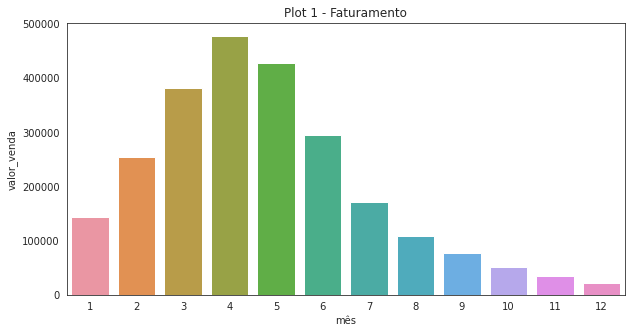

In [23]:
# Verificando a relação entre o mês de Julho com a frequência na qual se repetiu
# Será que foi o mês que mais faturou?
faturamento_agrupado1 = pd.DataFrame(df2.groupby('mês')['valor_venda'].mean().round(2))

# faturamento_agrupado1.head(13) - # Retorna o valor agrupado de cada mês, iniciando por Abril.

# Organizando os valores através de um dicionárinoio 
faturamento_agrupado2 = pd.DataFrame({'mês': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                     'valor_venda':[143302.30, 255288.90, 382821.85, 478056.04, 428887.46, 294540.64,
                                                     171029.99, 108174.70, 77939.20, 50616.16, 35602.41, 21972.23 ]},                                   
                                   columns = ['mês','valor_venda'])

# Plot do agrupamento organizado, iniciando por Janeiro
plt.figure(figsize=(10,5))
sns.barplot(x = 'mês', y = 'valor_venda', data = faturamento_agrupado2)
plt.title('Plot 1 - Faturamento');


**Principais Idéias :**


*   Média de hectares: 2059.25, mostrando que a carteira de clientes é bem ampla entre grande e pequeno produtor;

*   Média do valor das notas:  224.145,76, porém com desvio padrão bem alto [600k], indicando a possibilidade de outliers;

*   Mínimo do valor das notas: 0, identificando que tem clientes na carteira que não compram ou não compraram com a empresa;

*   Carteira de Cliente: Cerca de 4998 clientes
  * Existe algum tipo de fidelização por parte dos clientes?
  * Frequência de compra de cada cliente?

*    Cliente fidelizado com a empresa: 485 com 13 frequência de compras;
      
*    Perfil do produtor que mais compra: Grãos - SUL;

*    Defensivo lidera como insumo mais vendido;

*    Mês de Julho como o mais frequente em compras. 
        * Foi o que mais faturou?

*   Existe uma sazonalidade de faturamento, conforme plot acima, isso pode parecer prejudicial para a empresa, visto que ganhos devem ter um comportamento linear ou crescente ao longo dos meses;

*   Ao fim do primeiro e inicio do segundo trimestre foi o que mais faturou entre os meses:
      * Três, quatro e cinco;
      * Mês seis, apresenta uma queda considerável no valor faturado.

*   Mês sete, não foi o que mais faturou, logo a correlação com a frequência não está ligado diretamente ao faturamento.

# Visualizações - BOX PLOT

O Box Plot é uma maneira de representar
graficamente uma variável numérica baseado
em quartis.

» O primeiro quartil, Q1, é o valor que divide a distribuição dos dados em
duas partes distintas . Conforme o próprio nome, primeiro quartil remete
ao “um quarto”, ou 25% . Ou seja, o primeiro quartil divide os dados de
modo que um quarto, ou 25%, dos dados estejam abaixo desse valor e
os outros três quartos ou 75% restantes acima desse valor .

» O segundo quartil, Q2, equivalente à mediana, divide a distribuição
dos dados em dois grupos iguais . É o meio dos dados . Conforme o
nome “segundo quartil” remete, dois quartos dos dados (ou 50%)
se localizam abaixo desse valor e os outros dois quartos (ou 50%)
restantes, acima desse valor .

» Por fim, o terceiro quartil, Q3, é o valor que divide a distribuição dos
dados em dois grupos distintos . Agora, três quartos, ou 75% dos
dados, estão localizados abaixo do Q3, enquanto que o um quarto
restante (ou 25%) acima deste .

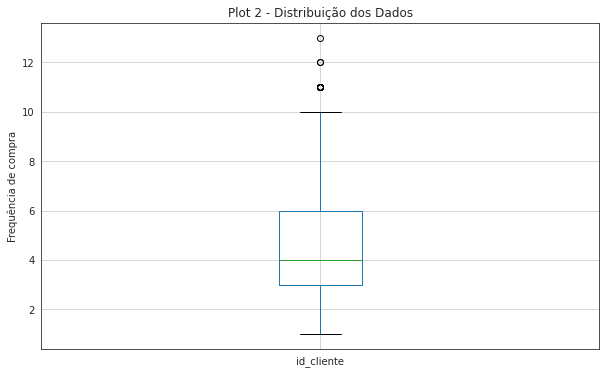

In [24]:
plt.figure(figsize=(10,6))

ranking_clientes.boxplot(['id_cliente'])

plt.title('Plot 2 - Distribuição dos Dados')

plt.ylabel('Frequência de compra');


### Calculando os Quartis

In [25]:
id_cliente = ranking_clientes['id_cliente']

In [26]:
Q1 = id_cliente.quantile(.25)
Q1

3.0

In [27]:
Q3 = id_cliente.quantile(.75)
Q3

6.0

In [28]:
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

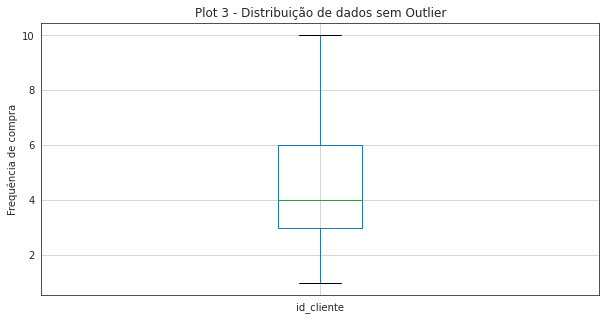

In [29]:
#Seleção dos dados dentro dos limites
selecao = (id_cliente >= limite_inferior) & (id_cliente <= limite_superior)
boxplot2 = pd.DataFrame(id_cliente[selecao])

plt.figure(figsize=(10,5))
boxplot2.boxplot(['id_cliente']).set_title('Plot 3 - Distribuição de dados sem Outlier')

plt.ylabel('Frequência de compra')
plt.show()


**Principais Idéias :**


*   Com o cálculo dos quartis é possível identificar a representação no número de compras por clientes.
    * 25% de 4988 = 1.247 Clientes compraram três vezes;
    * 75% de 4988 = 3.741 Clientes compraram seis vezes.
    * A mediana, ou seja, o valor central da frequência de venda é, quatro.

*   O Box Plot apresentou o chamado outlier. Este é representado através de um (asterisco) ou um ponto, conforme Plot 2.
    * Como outlier entende-se um valor atípico, popularmente chamado de “ponto fora da curva”. É um valor que se distanciou muito dos demais.
    * Nesse caso vamos considerar como ponto positivo esse outliers, visto que analisamos o fator "Frequência de compra", ou seja, quanto mais compras melhor é para empresa, em resumo, tivemos clientes que execederam o limite superior de dez compras ao ano.

# Nova Análise - Os Outliers

Com o que foi descoberto na visualização dos dados através do box plot, vamos tratar os outliers como um grupo de fiés a empresa, nas seguintes análises:
   * Análise da relação Valor da venda e Propriedade;
   * Mostrar que tipo de insumo e perfil de produtor, que tiveram maior destaque;
   * Teste de Hipótese perfil de propriedade e valor de venda.
   

In [30]:
# Criação de um arquivo apenas com os clientes considerados Outliers

df3 = df2.groupby('id_cliente').filter(lambda x: len(x) >= 10)
df3.to_csv('dadosv3.csv')
df3

,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
54,Janeiro,2021-01-05,515,14.40,HF,Fertilizantes,1980.50
138,Janeiro,2021-01-10,3831,12.00,HF,Defensivo,5635.48
370,Janeiro,2021-01-21,4487,298.08,Café,Fertilizantes,245753.60
526,Janeiro,2021-01-26,3831,12.00,HF,Defensivo,18784.92
544,Janeiro,2021-01-27,2256,13.20,HF,Fertilizantes,1286.04
...,...,...,...,...,...,...,...
23215,Dezembro,2021-12-28,876,2731.20,Grãos - MAPITOBA,Defensivo,87560.83
23222,Dezembro,2021-12-29,1394,685.15,Grãos - MAPITOBA,Defensivo,1558.54
23236,Dezembro,2021-12-31,408,573.60,Grãos - Sul,Sementes,163954.00
23243,Dezembro,2021-12-31,3439,322.56,Grãos - Sul,Defensivo,5203.01


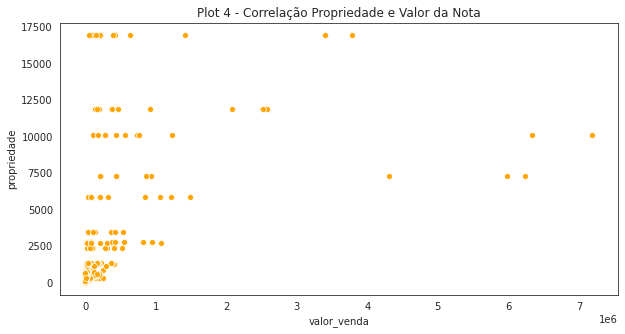

In [47]:
# Análise da relação valor da venda e propriedade
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'valor_venda', y= 'propriedade', data=df3, color = 'orange')

plt.title('Plot 4 - Correlação Propriedade e Valor da Nota');

In [ ]:
# Análise descritiva dos três primeiros meses

# Março
analise_março = df[df['mês'] == 'Março'].set_index('data')
analise_março

# Describe de valor númericos
analise_março.describe().round(2)

# Describe de categorias
analise_março.describe(include = ['object', 'category'])

In [ ]:
# Abril
analise_abril = df[df['mês'] == 'Abril'].set_index('data')
analise_abril

# Describe de valor númericos
analise_abril.describe().round(2)

# Describe de categorias
analise_abril.describe(include = ['object', 'category'])

In [ ]:
# Maio
analise_maio = df[df['mês'] == 'Maio'].set_index('data')
analise_maio

# Describe de valor númericos
analise_maio.describe().round(2)

# Describe de categorias
analise_maio.describe(include = ['object', 'category'])